In [1]:
using ExprOptimization, Random

In [2]:
const grammar = @grammar begin
    R = x
    R = R * R
    R = R + R
end

1: R = x
2: R = R * R
3: R = R + R


Sample a random derivation tree

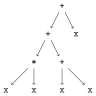

In [3]:
Random.seed!(1)
tree = rand(RuleNode, grammar, :R, 4)
display(tree, grammar)

Get the expression encoded by the tree

In [4]:
ex = get_executable(tree, grammar)

:((x * x + (x + x)) + x)

In [5]:
const S = SymbolTable(grammar)

Dict{Symbol,Any} with 2 entries:
  :+ => +
  :* => *

Define ground truth expression for symbolic regression and the loss function.

In [6]:
ground_truth(x) = x^3 + x^2 + x
function loss(tree::RuleNode, grammar::Grammar)
    ex = get_executable(tree, grammar)
    los = 0.0
    for x = -5.0:0.5:5.0
        S[:x] = x
        los += abs2(Core.eval(S,ex) - ground_truth(x))
    end
    los
end

loss (generic function with 1 method)

Monte Carlo optimization

In [7]:
?MonteCarlo

search: MonteCarlo MonteCarlos



```
MonteCarlo
```

Monte Carlo.

# Arguments:

  * `num_samples::Int`: number of samples
  * `max_depth::Int`: maximum depth of derivation tree


In [8]:
Random.seed!(1)
p = MonteCarlo(10000, 5)
results1 = optimize(p, grammar, :R, loss)
(results1.expr, results1.loss)

(:(x * (x + x * x) + x), 0.0)

Genetic Programming optimization

In [9]:
?GeneticProgram

search: GeneticProgram GeneticPrograms



```
GeneticProgram
```

Genetic Programming.

# Arguments

  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `max_depth::Int`: maximum depth of derivation tree
  * `p_reproduction::Float64`: probability of reproduction operator
  * `p_crossover::Float64`: probability of crossover operator
  * `p_mutation::Float64`: probability of mutation operator
  * `init_method::InitializationMethod`: initialization method
  * `select_method::SelectionMethod`: selection method


In [10]:
Random.seed!(1)
p = GeneticProgram(1000,10,5,0.3,0.3,0.4)
results2 = optimize(p, grammar, :R, loss)
(results2.expr, results2.loss)

(:(x * (x + x * x) + x), 0.0)

In [11]:
?GrammaticalEvolution

search: GrammaticalEvolution GrammaticalEvolutions



```
GrammaticalEvolution
```

Grammatical Evolution.

# Arguments

  * `grammar::Grammar`: grammar
  * `typ::Symbol`: start symbol
  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `init_gene_length::Int`: initial length of genotype integer array
  * `max_gene_length::Int`: maximum length of genotype integer array
  * `max_depth::Int`: maximum depth of derivation tree
  * `p_reproduction::Float64`: probability of reproduction operator
  * `p_crossover::Float64`: probability of crossover operator
  * `p_mutation::Float64`: probability of mutation operator
  * `select_method::SelectionMethod`: selection method (default: tournament selection)
  * `mutate_method::InitializationMethod`: mutation method (default: multi-mutate)


In [12]:
Random.seed!(1)
p = GrammaticalEvolution(grammar,:R,1000,10,10,10,5,0.3,0.3,0.4; select_method=GrammaticalEvolutions.TruncationSelection(250))
results3 = optimize(p, grammar, :R, loss)
(results3.expr, results3.loss)

(:(x + (x + x * x) * x), 0.0)

In [13]:
?CrossEntropy

search: CrossEntropy CrossEntropys



```
CrossEntropy
```

Cross Entropy method.

# Arguments

  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `max_depth::Int`: maximum depth of derivation tree
  * `top_k::Int`: top k elite samples used in selection
  * `p_init::Float64`: initial value when fitting MLE
  * `init_method::InitializationMethod`: Initialization method


In [14]:
Random.seed!(1)
p = CrossEntropy(1000,10,5,500)
results3 = optimize(p, grammar, :R, loss)
(results3.expr, results3.loss)

(:((x + x * (x * x)) + x * x), 0.0)

In [15]:
?PIPE

search: PIPE PIPEs Pipe pipeline PipeBuffer partialsortperm partialsortperm!



```
PIPE
```

Probabilistic Incremental Program Evolution. Example parameters from paper are indicated in parentheses)

# Arguments:

  * `ppt_params::PPT`: parameters for PPT  (e.g., [0.8, 0.2])
  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `p_elitist::Float64`: elitist update probability (e.g., 0.2)
  * `c::Float64`: learning rate multiplier (e.g., 0.1)
  * `α::Float64`: learning rate (e.g., 0.05)
  * `ϵ::Float64`: fitness constant (e.g., 1)
  * `p_mutation::Float64`: mutation probability (e.g., 0.2)
  * `β::Float64`: mutation rate (e.g., 0.6)
  * `p_threshold::Float64`: prune threshold (e.g., 0.999)
  * `max_depth::Int`: maximum depth of derivation tree


In [16]:
Random.seed!(0)
p = PIPE(PPT(0.8),1000,10,0.2,0.1,0.05,1,0.2,0.6,0.999,10)
results4 = optimize(p, grammar, :R, loss)
(results4.expr, results4.loss)

(:((x + x * x) * x + x), 0.0)